In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [2]:
#termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
FILE_NAME = "calib_radial.jpg"
img = cv.imread(FILE_NAME)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
#Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (7,6), None)

In [5]:
objp = np.zeros((6*7, 3), np.float32)
objp[:,:2] = np.mgrid[0:7, 0:6].T.reshape(-1,2)

#Arrays to store object points and image points from all the images
objpoints = [] #3d point in real world space
imgpoints = [] #2d points in image plane


    

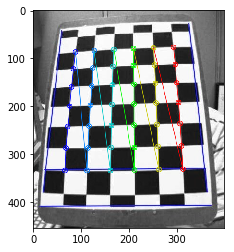

In [6]:
if ret == True:
    
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1, -1), criteria)
    imgpoints.append(corners)

    cv.drawChessboardCorners(img, (7,6), corners2, ret)

    plt.imshow(img)
    plt.show()
    